# Problem Statement

We have IBM Company Attrition problem.The goal is to predict is employee left company or not using different feature provided in dataset.so now we have to predict the Attrition by Training the model from Training dataset & predict on test data set by using differnt algorithms including machine learning & deep learning

# Algoritm used :
Logistic regression

Decision Tree Classifier

Random forest Classifier

Adaboost Classifier

Artificial Neural Network

# Libraries

In [1]:
# Import the required Libraries.

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read Data

In [2]:
#Read the file
Attrition = pd.read_excel("E:/data/attritionCaseStudy.xlsx")

# Data Analysis

In [3]:
#Number of rows and columns
Attrition.shape

(1470, 35)

In [4]:
#Attrition.head()
#Attrition.tail()
 
Attrition.sample(5)   #Sample

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
811,0,38,Travel_Rarely,130,Sales,2,2,Marketing,1,1125,...,3,80,0,10,2,3,1,0,0,0
556,0,53,Travel_Rarely,346,Research & Development,6,3,Life Sciences,1,769,...,4,80,0,19,4,3,2,2,2,2
1405,0,31,Non-Travel,697,Research & Development,10,3,Medical,1,1979,...,3,80,1,13,2,4,11,7,4,8
612,0,28,Travel_Rarely,760,Sales,2,4,Marketing,1,846,...,1,80,0,8,2,3,8,7,7,5
307,0,38,Travel_Rarely,849,Research & Development,25,2,Life Sciences,1,421,...,3,80,1,19,2,3,10,8,0,1


In [5]:
#Data type 
Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Checking if there are any null values
Attrition.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Missing data in dataset

In [7]:
#The distribution of the data 
Attrition.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis

In [8]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g")
        plt.show()
    
        sb.distplot(df[i],color ="r")
        plt.show()
        
        sb.scatterplot(Attrition[i],Attrition.MonthlyRate)
        plt.show()

    
    for i in df[cat]:
        sb.countplot(Attrition[i],palette = "husl",hue = Attrition.Attrition)
        plt.show()
        sb.boxplot(Attrition[i],Attrition.MonthlyRate,hue = Attrition.Attrition)
        plt.show()

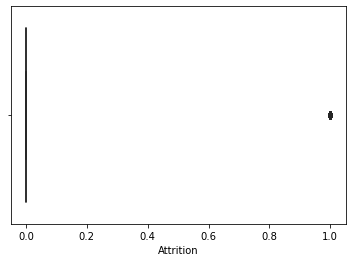

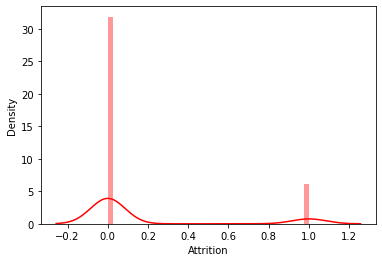

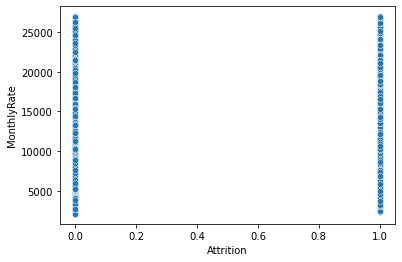

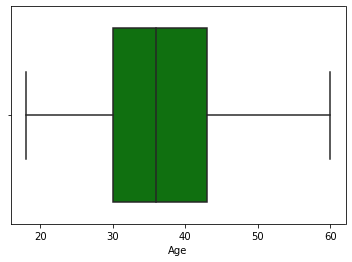

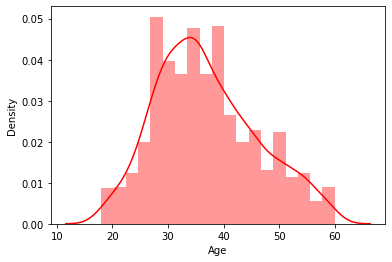

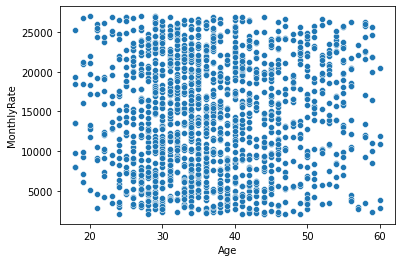

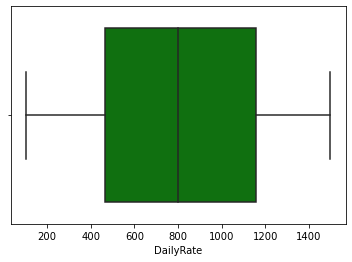

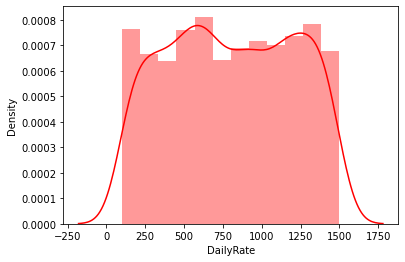

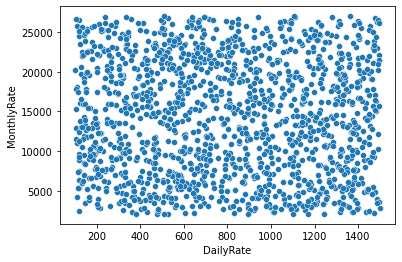

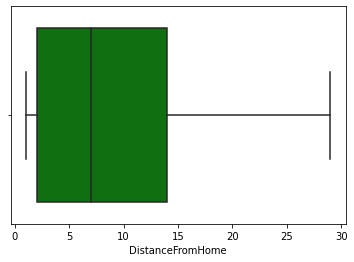

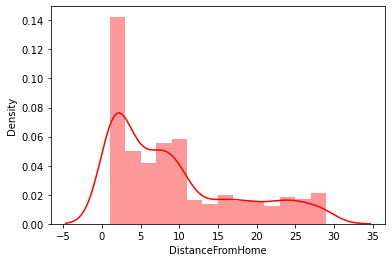

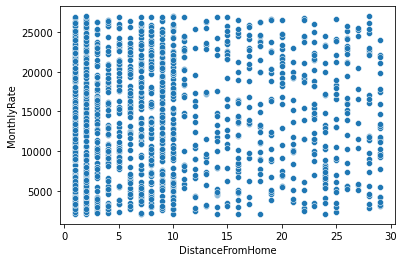

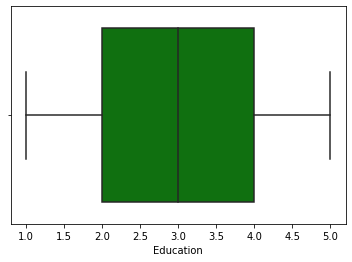

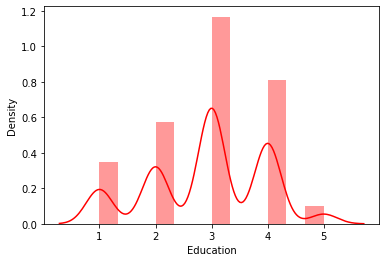

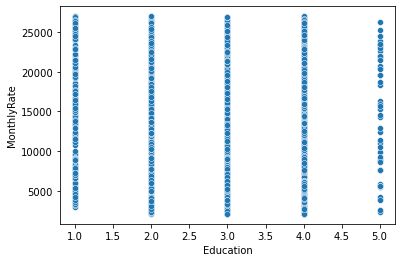

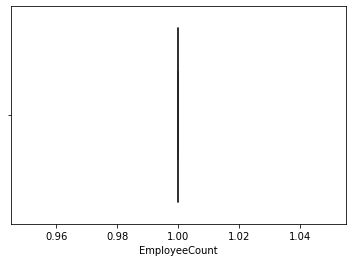

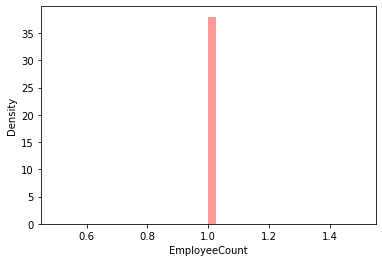

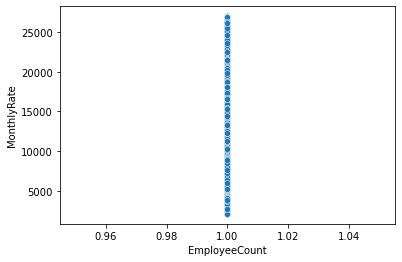

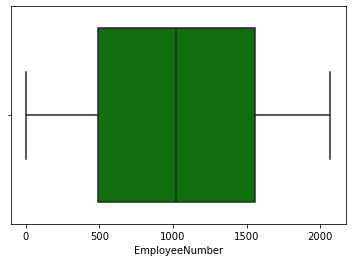

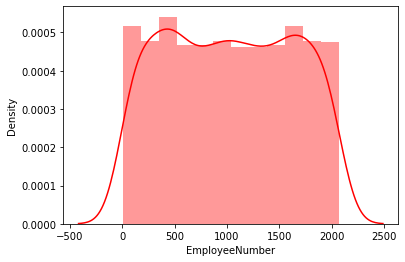

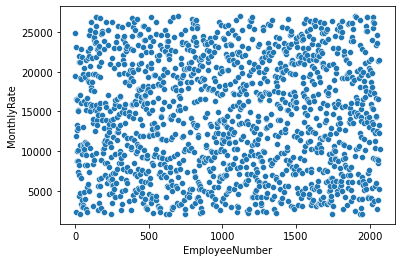

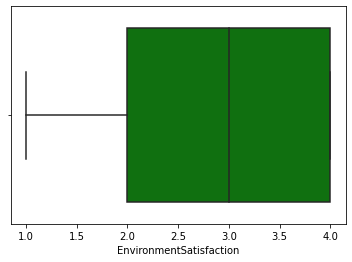

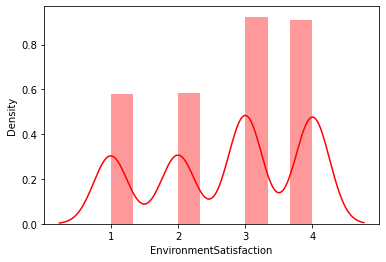

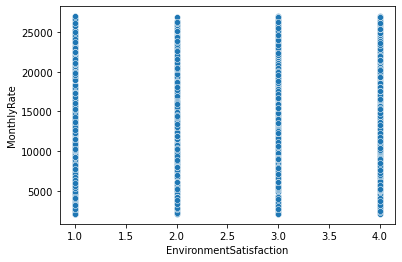

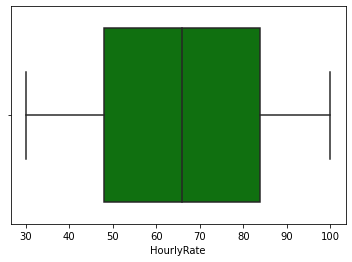

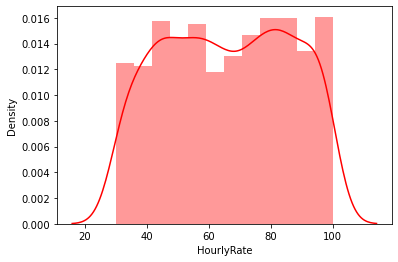

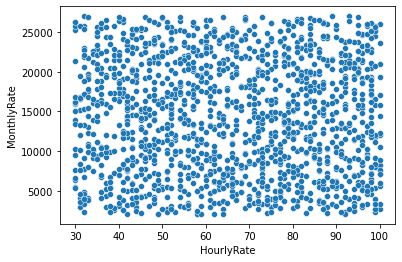

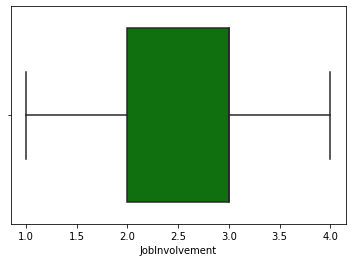

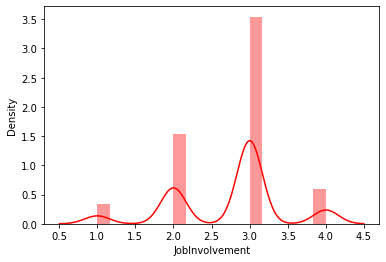

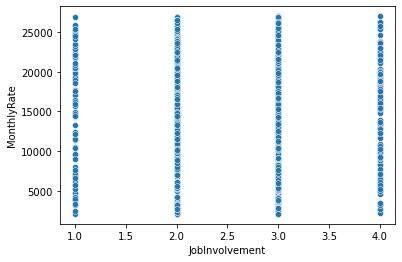

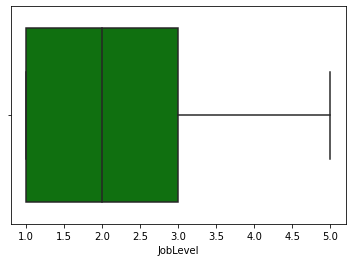

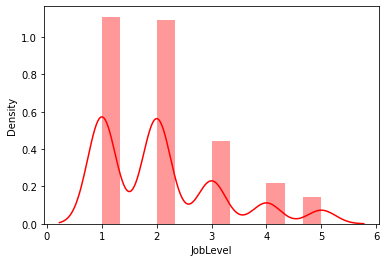

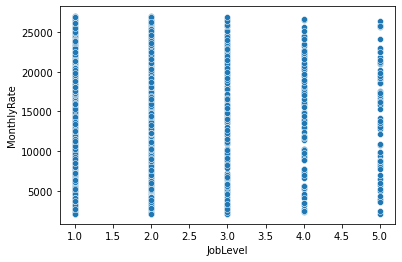

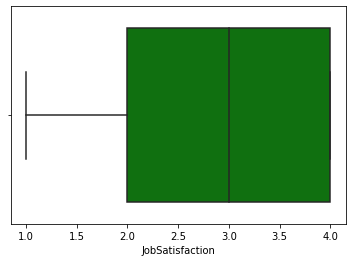

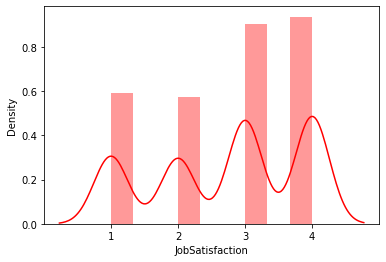

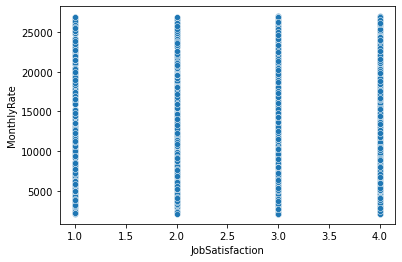

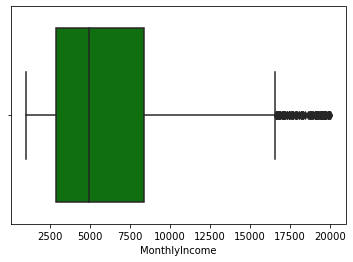

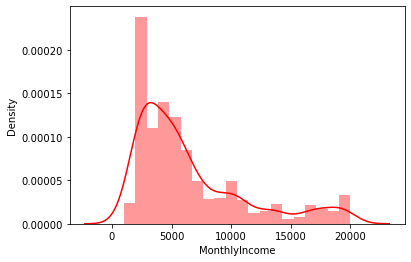

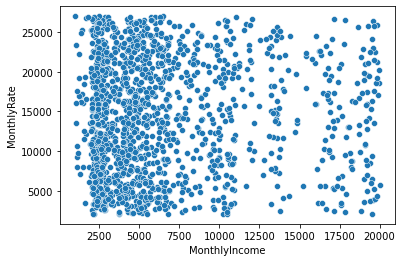

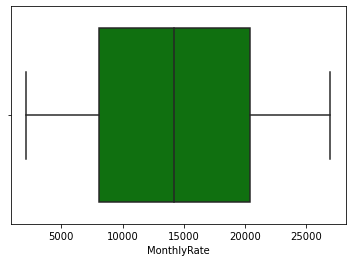

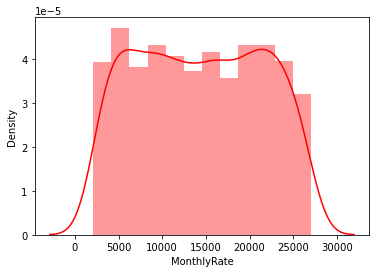

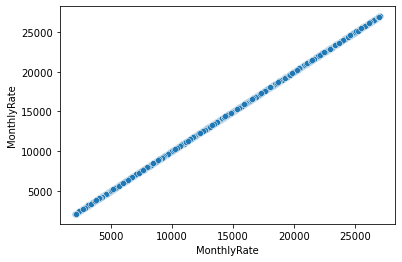

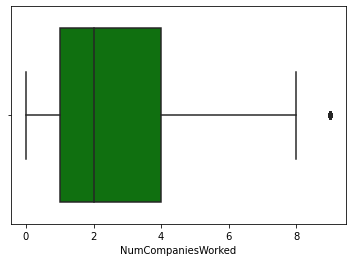

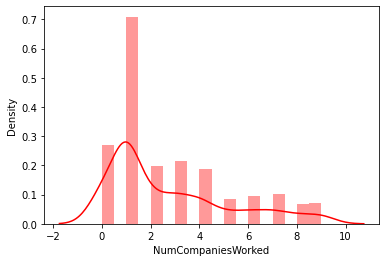

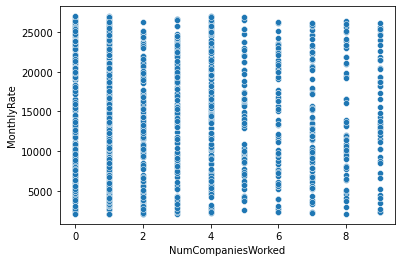

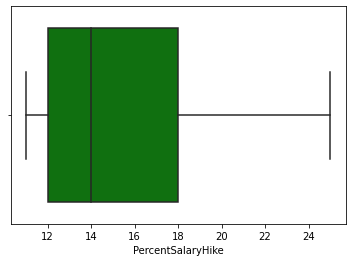

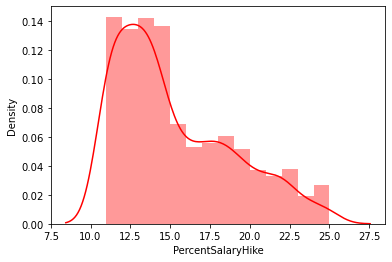

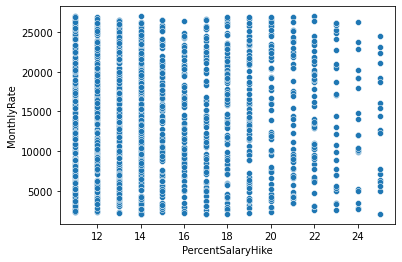

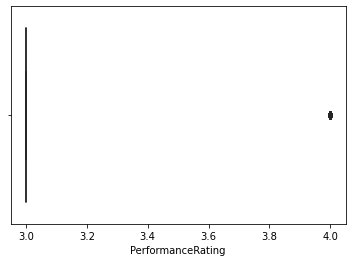

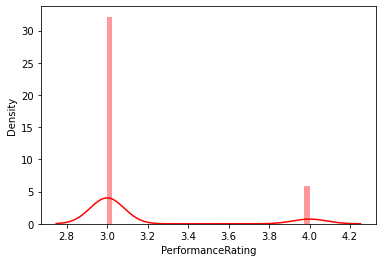

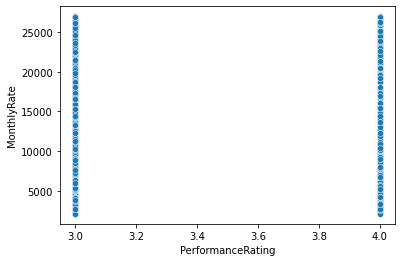

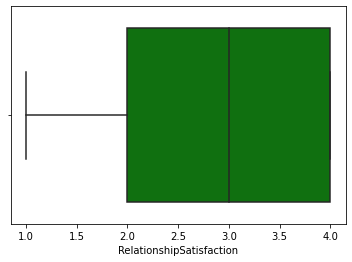

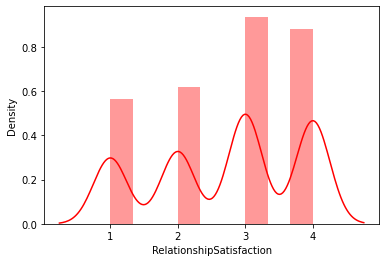

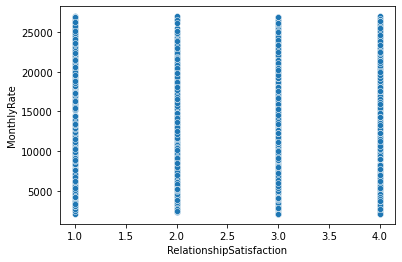

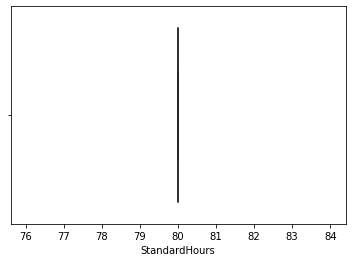

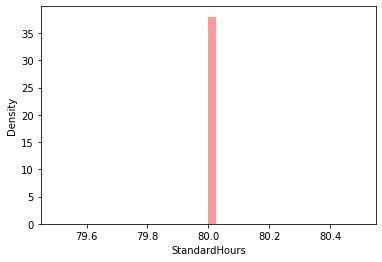

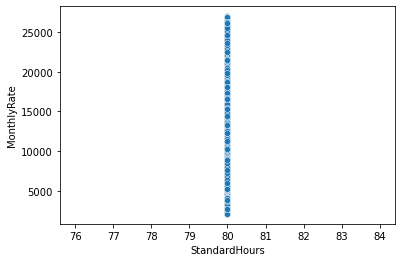

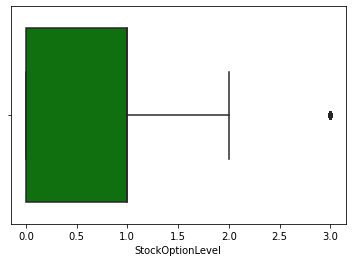

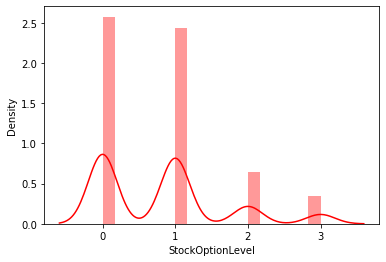

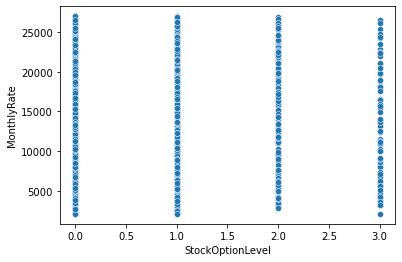

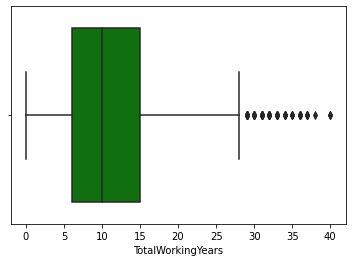

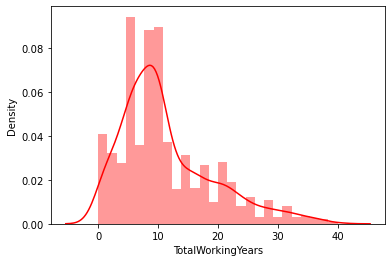

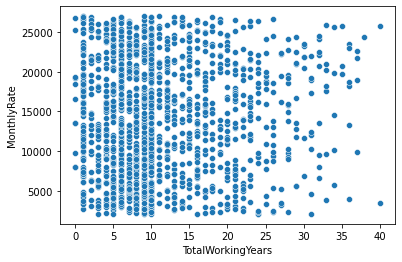

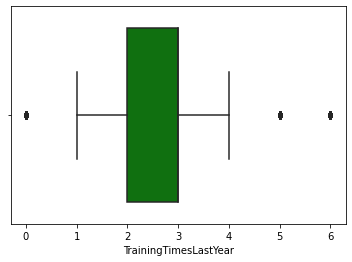

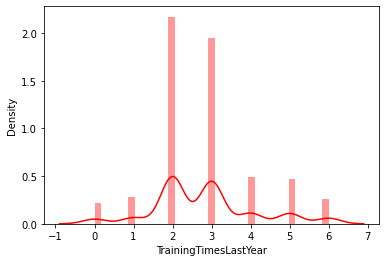

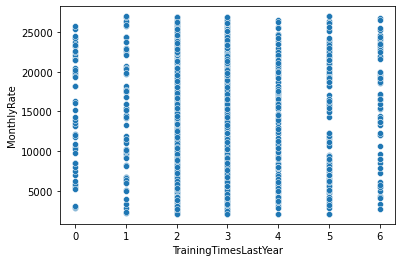

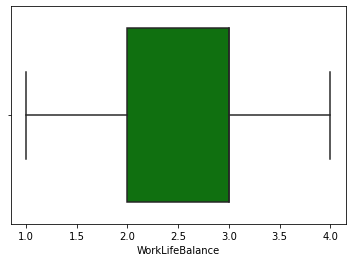

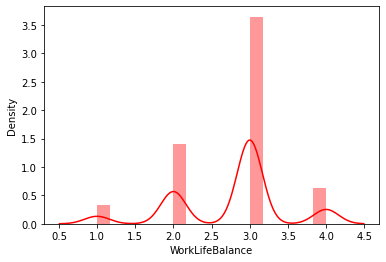

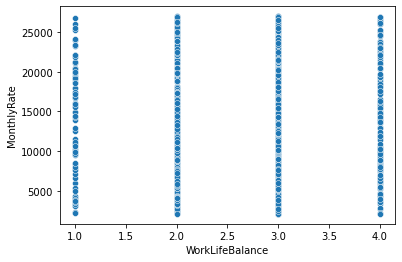

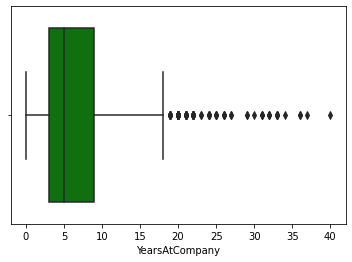

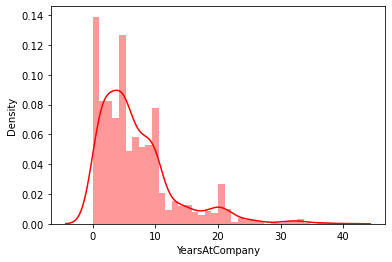

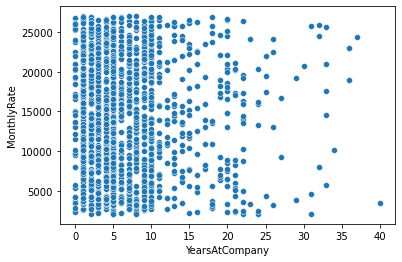

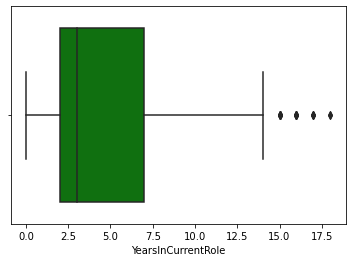

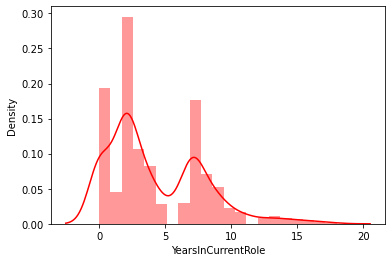

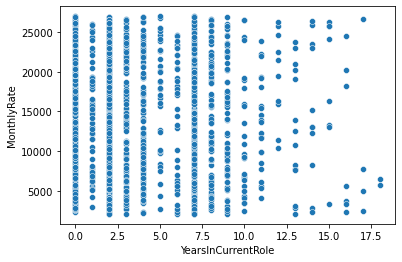

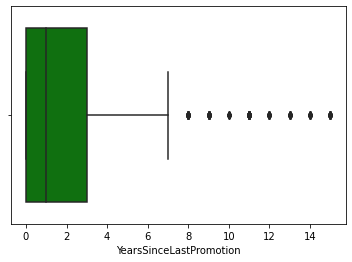

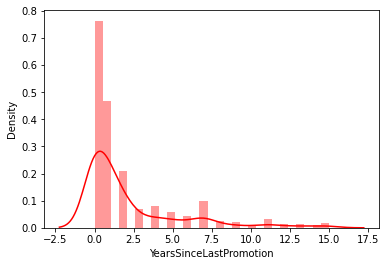

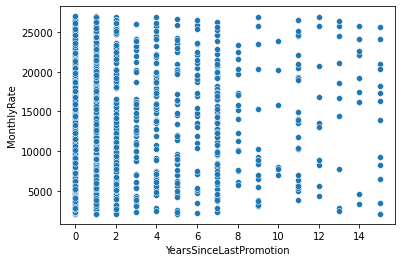

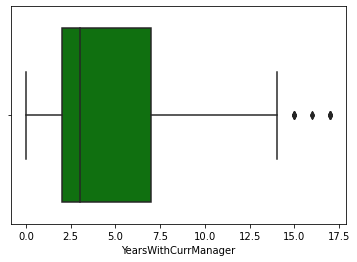

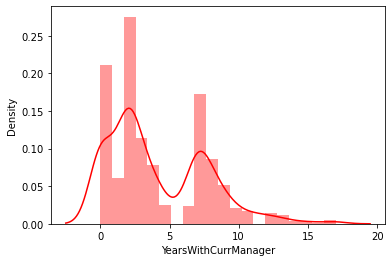

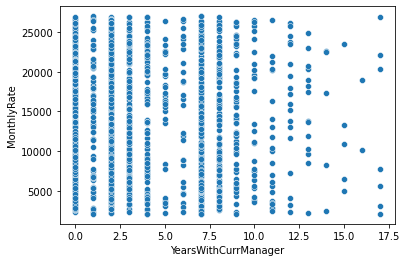

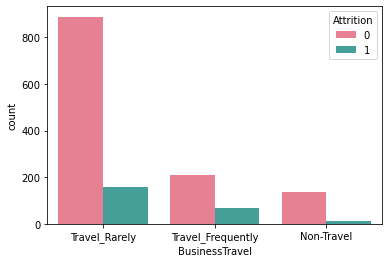

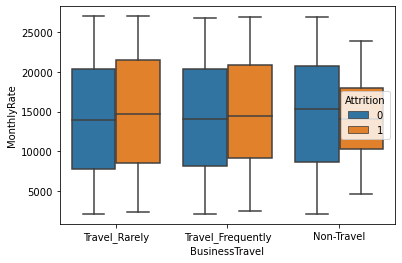

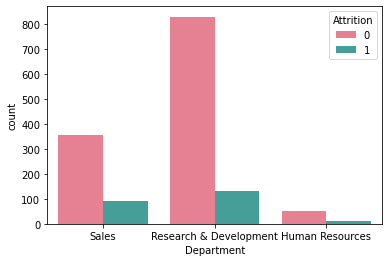

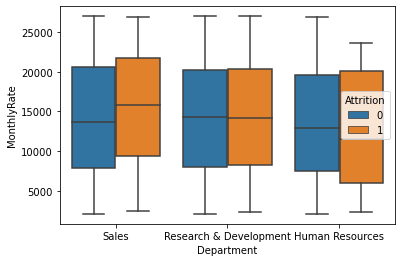

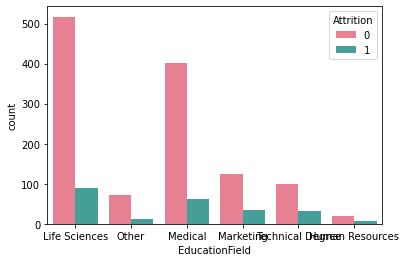

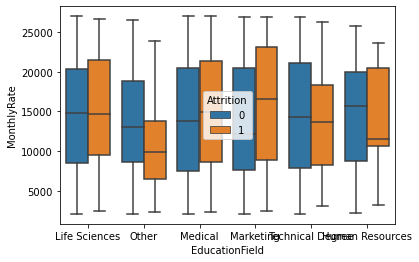

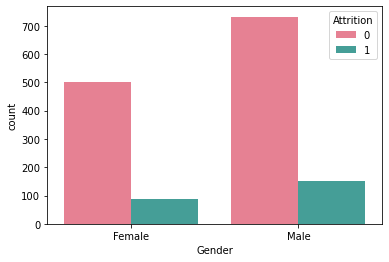

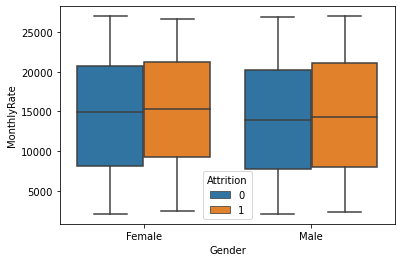

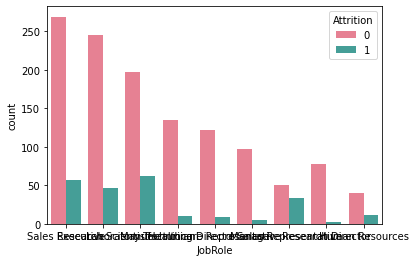

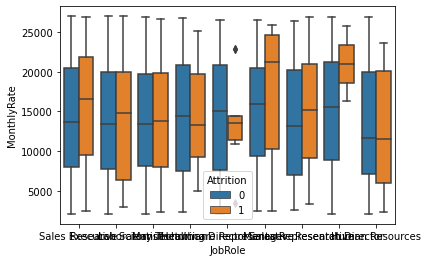

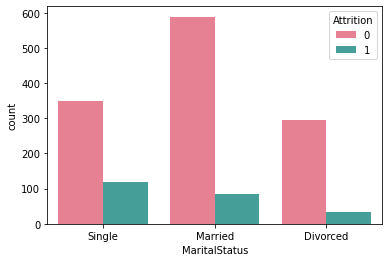

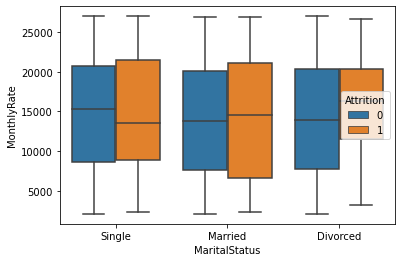

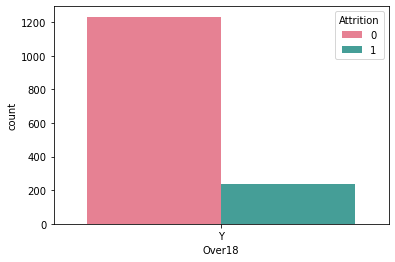

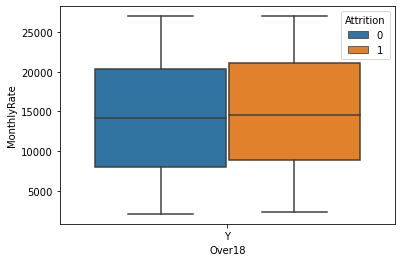

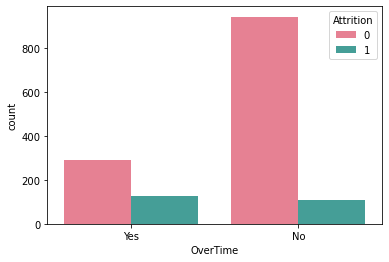

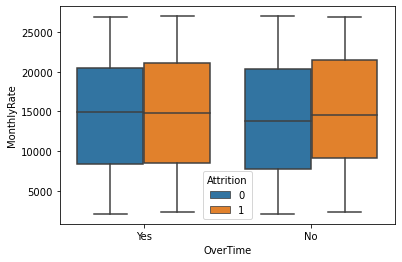

In [9]:
EDA(Attrition)

# Feature Engineering & selection 

In [10]:
# ANOVA test for checking important continous features
cat = []
con = []
for i in Attrition.columns:
    if(Attrition[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

imp_con_cols = []
for i in con :
    pval = ANOVA(Attrition,i,"Attrition")
    print("Attrition vs ",i, ANOVA(Attrition,i,"Attrition"))
    if(pval < 0.05 ):
        imp_con_cols.append(i)

Attrition vs  Attrition 0.0
Attrition vs  Age 0.0
Attrition vs  DailyRate 0.0299
Attrition vs  DistanceFromHome 0.0028
Attrition vs  Education 0.2293
Attrition vs  EmployeeCount 0.0227
Attrition vs  EmployeeNumber 0.6853
Attrition vs  EnvironmentSatisfaction 0.0001
Attrition vs  HourlyRate 0.7931
Attrition vs  JobInvolvement 0.0
Attrition vs  JobLevel 0.0
Attrition vs  JobSatisfaction 0.0001
Attrition vs  MonthlyIncome 0.0
Attrition vs  MonthlyRate 0.5611
Attrition vs  NumCompaniesWorked 0.0955
Attrition vs  PercentSalaryHike 0.6056
Attrition vs  PerformanceRating 0.9119
Attrition vs  RelationshipSatisfaction 0.0787
Attrition vs  StandardHours 0.0227
Attrition vs  StockOptionLevel 0.0
Attrition vs  TotalWorkingYears 0.0
Attrition vs  TrainingTimesLastYear 0.0226
Attrition vs  WorkLifeBalance 0.0142
Attrition vs  YearsAtCompany 0.0
Attrition vs  YearsInCurrentRole 0.0
Attrition vs  YearsSinceLastPromotion 0.2058
Attrition vs  YearsWithCurrManager 0.0


In [11]:
imp_con_cols

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [12]:
def chisquare(df,cat1,cat2):
    from scipy.stats import chi2_contingency
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b


In [13]:
imp_cat_cols = []
for i in Attrition.columns:
    if(Attrition[i].dtypes=="object"):
        x = chisquare(Attrition,"Attrition",i)
        if(x<0.05):
            imp_cat_cols.append(i)
            print("Attrition vs ",i,"--->",Attrition)

Attrition vs  BusinessTravel --->       Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
...         ...  ...                ...        ...                     ...   
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Educa

In [14]:
imp_cols = []
imp_cols.extend(imp_con_cols)
imp_cols.extend(imp_cat_cols)

In [15]:
imp_cols.remove("Attrition")

# Define X and Y

In [16]:
Y = Attrition[["Attrition"]]
X = Attrition.drop(["Attrition"],axis=1)

In [17]:
Y_Original = Y[["Attrition"]]

In [18]:
len(X.columns)

34

In [19]:
len(X[imp_cols].columns)

23

In [20]:
X = X[imp_cols]

In [21]:
len(X.columns)

23

# Data Preprocessing

Using one hot encoding for categorical and standardscaler for continous varibles

In [22]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [23]:
Xnew = preprocessing(X)

# Outlier Treatment

In [24]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [25]:
outliers= outliers(Xnew)

In [26]:
outliers

[28,
 62,
 63,
 85,
 98,
 123,
 126,
 153,
 187,
 190,
 231,
 237,
 270,
 281,
 386,
 401,
 411,
 425,
 445,
 466,
 473,
 477,
 561,
 592,
 595,
 616,
 624,
 635,
 653,
 677,
 686,
 716,
 746,
 749,
 861,
 875,
 894,
 914,
 918,
 926,
 956,
 962,
 976,
 1024,
 1043,
 1078,
 1086,
 1111,
 1116,
 1135,
 1138,
 1184,
 1301,
 1327,
 1348,
 1351,
 1401,
 1430]

In [27]:
Xnew = Xnew.drop(outliers)

In [28]:
Y = Y.drop(outliers)

In [30]:
import pandas as pd


# set index
index = pd.Index(range(0, 1412, 1))
Xnew = Xnew.set_index(index)
print(Xnew)

           Age  DailyRate  DistanceFromHome  EmployeeCount  \
0     0.446350   0.742527         -1.010909            0.0   
1     1.322365  -1.297775         -0.147150            0.0   
2     0.008343   1.414363         -0.887515            0.0   
3    -0.429664   1.461466         -0.764121            0.0   
4    -1.086676  -0.524295         -0.887515            0.0   
...        ...        ...               ...            ...   
1407 -0.101159   0.202082          1.703764            0.0   
1408  0.227347  -0.469754         -0.393938            0.0   
1409 -1.086676  -1.605183         -0.640727            0.0   
1410  1.322365   0.546677         -0.887515            0.0   
1411 -0.320163  -0.432568         -0.147150            0.0   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                   -0.660531        0.379672 -0.057788         1.153254   
1                    0.254625       -1.026167 -0.057788        -0.660853   
2                    1.1697

In [31]:
import pandas as pd


# set index
index = pd.Index(range(0, 1412, 1))
Y = Y.set_index(index)
#print(Y)

# Divide data in Training & testing set

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(xtrain,ytrain)

In [34]:
pred_tr = model_log_reg.predict(xtrain)
pred_ts = model_log_reg.predict(xtest)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc_log_reg = accuracy_score(ytrain,pred_tr)
ts_acc_log_reg = accuracy_score(ytest,pred_ts)
print("training_accuracy_log_reg :", tr_acc_log_reg)
print("testing_accuracy_log_reg :", ts_acc_log_reg)

training_accuracy_log_reg : 0.895482728077945
testing_accuracy_log_reg : 0.8515901060070671


In [36]:
confusion_matrix(ytrain,pred_tr)

array([[924,  22],
       [ 96,  87]], dtype=int64)

In [37]:
confusion_matrix(ytest,pred_ts)

array([[229,   4],
       [ 38,  12]], dtype=int64)

# Create DecisionTree Classifier Model

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model_dtc = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_dec_tree = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree :", tr_acc_dec_tree)
print("testing_accuracy_dec_tree :", ts_acc_dec_tree)

training_accuracy_dec_tree : 1.0
testing_accuracy_dec_tree : 0.8268551236749117


# Decision Tree Model has good training accuracy but give bad testing accuracy - model is overfitted

so we use prunning to overcome this overfitting, for that we use "min samples leaf" Hyperparameter

In [57]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,60,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 23}

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=23)
model_dtc1 = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc1.predict(xtrain)
predts1 = model_dtc1.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_dec_tree_leaf = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree_leaf = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree_leaf :", tr_acc_dec_tree_leaf)
print("testing_accuracy_dec_tree_leaf :", ts_acc_dec_tree_leaf)

training_accuracy_dec_tree_leaf : 0.8759964570416298
testing_accuracy_dec_tree_leaf : 0.8268551236749117


In [59]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_split":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 14}

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=14)
model_dtc_split = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc_split.predict(xtrain)
predts1 = model_dtc_split.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_dec_tree_split = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree_split = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree_split :", tr_acc_dec_tree_split)
print("testing_accuracy_dec_tree_split :", ts_acc_dec_tree_split)

training_accuracy_dec_tree_split : 0.9255978742249779
testing_accuracy_dec_tree_split : 0.8268551236749117


In [61]:
from sklearn.model_selection import GridSearchCV
tg = {"max_depth":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 3}

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=3)
model_dtc_maxdepth = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc_maxdepth.predict(xtrain)
predts1 = model_dtc_maxdepth.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_maxdepth = accuracy_score(ytrain,predtr1)
ts_acc_maxdepth = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree :", tr_acc_maxdepth)
print("testing_accuracy_dec_tree :", ts_acc_maxdepth)

training_accuracy_dec_tree : 0.8609388839681134
testing_accuracy_dec_tree : 0.8303886925795053


# Create Random Forest classifier model

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 21)
model_rfc = rfc.fit(xtrain,ytrain)
predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_rf = accuracy_score(ytrain,predtr2)
ts_acc_rf = accuracy_score(ytest,predts2)
print("training_accuracy_rf :", tr_acc_rf)
print("testing_accuracy_rf :", ts_acc_rf)

training_accuracy_rf : 1.0
testing_accuracy_rf : 0.8586572438162544


# Random Forest Model has good training accuracy but give bad testing accuracy - model is overfitted

#so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [65]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfc = RandomForestClassifier(random_state = 21)
cv1 = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 79}

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=79,random_state = 21,min_samples_leaf=25)
model_rfc1 = rfc.fit(xtrain,ytrain)
predtr2 = model_rfc1.predict(xtrain)
predts2 = model_rfc1.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)
print("training_accuracy_rf :", tr_acc_rf)
print("testing_accuracy_rf :", ts_acc_rf)

training_accuracy_rf : 1.0
testing_accuracy_rf : 0.8586572438162544


# Create Adaboost model

In [67]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
model_abc = abc.fit(xtrain,ytrain)
predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
ts_acc_abc = accuracy_score(ytest,predts3)
print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)

training_accuracy_abc : 1.0
testing_accuracy_abc : 0.823321554770318


# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted
so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [68]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 51}

In [69]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,min_samples_leaf=25),n_estimators=51)
model_abc_estimator = abc.fit(xtrain,ytrain)
predtr3 = model_abc_estimator.predict(xtrain)
predts3 = model_abc_estimator.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
tr_acc_abc = accuracy_score(ytest,predts3)
print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)

training_accuracy_abc : 0.833922261484099
testing_accuracy_abc : 0.823321554770318


# Create Neural Network

In [70]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(32,activation="relu",input_dim = xtrain.shape[1])) # Input Layer
nn.add(Dense(32,activation="relu")) # Hidden Layer
nn.add(Dense(1,activation="sigmoid")) # Output Layer
nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(Xnew,Y,validation_split=0.2,epochs=250)

Epoch 1/250
36/36 [==============================] - 2s 14ms/step - loss: 0.4586 - accuracy: 0.8255 - val_loss: 0.4029 - val_accuracy: 0.8481
Epoch 2/250
36/36 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8317 - val_loss: 0.3889 - val_accuracy: 0.8481
Epoch 3/250
36/36 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8326 - val_loss: 0.3764 - val_accuracy: 0.8481
Epoch 4/250
36/36 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8423 - val_loss: 0.3663 - val_accuracy: 0.8587
Epoch 5/250
36/36 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.8547 - val_loss: 0.3581 - val_accuracy: 0.8693
Epoch 6/250
36/36 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8618 - val_loss: 0.3521 - val_accuracy: 0.8693
Epoch 7/250
36/36 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8716 - val_loss: 0.3459 - val_accuracy: 0.8728
Epoch 8/250


# Keras tuner for Overcome Overfitting Condition

In [71]:
import keras_tuner as kt

In [72]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(200,input_dim=(Xnew.shape[1])))
    nn.add(Dropout(0.1))
    y = hp.Choice("units",values=[64,128,256,512])
    nn.add(Dense(units=y))
    x = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate=x))
    nn.add(Dense(20))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [73]:
tuner = kt.Hyperband(model_builder,
             objective="val_accuracy",
             max_epochs=200,
             directory="E:/ETLHIVE/NN_Attrition",
             project_name="NN_Attrition_tuner")

In [74]:
tuner.search(xtrain,ytrain,epochs=30,validation_split=0.2)

Trial 35 Complete [00h 00m 02s]
val_accuracy: 0.8539823293685913

Best val_accuracy So Far: 0.8672566413879395
Total elapsed time: 00h 01m 19s
INFO:tensorflow:Oracle triggered exit


In [75]:
best = tuner.get_best_hyperparameters(num_trials=7)[0]

In [76]:
best.get("rate")  # Hyperparameter for DropOut

0.1

In [77]:
best.get("units") # Hyperparameter for Hidden layer size

512

In [78]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(512,activation="relu",input_dim = xtrain.shape[1])) # Input Layer
nn.add(Dropout(0.1))
nn.add(Dense(512,activation="relu")) # Hidden Layer
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid")) # Output Layer
nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(Xnew,Y,validation_split=0.2,epochs=200)

Epoch 1/200
36/36 [==============================] - 2s 18ms/step - loss: 0.3991 - accuracy: 0.8388 - val_loss: 0.3411 - val_accuracy: 0.8622
Epoch 2/200
36/36 [==============================] - 0s 11ms/step - loss: 0.3230 - accuracy: 0.8707 - val_loss: 0.3481 - val_accuracy: 0.8728
Epoch 3/200
36/36 [==============================] - 0s 11ms/step - loss: 0.2997 - accuracy: 0.8813 - val_loss: 0.3320 - val_accuracy: 0.8693
Epoch 4/200
36/36 [==============================] - 0s 12ms/step - loss: 0.2814 - accuracy: 0.8849 - val_loss: 0.3251 - val_accuracy: 0.8799
Epoch 5/200
36/36 [==============================] - 0s 13ms/step - loss: 0.2513 - accuracy: 0.9008 - val_loss: 0.3510 - val_accuracy: 0.8799
Epoch 6/200
36/36 [==============================] - 0s 12ms/step - loss: 0.2372 - accuracy: 0.8999 - val_loss: 0.3732 - val_accuracy: 0.8516
Epoch 7/200
36/36 [==============================] - 0s 11ms/step - loss: 0.2226 - accuracy: 0.9132 - val_loss: 0.3491 - val_accuracy: 0.8516
Epoch 